## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

In [73]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

In [74]:
symbols = ['MSFT','AMZN','AAPL','GOOG','FB']
start_date = '2019-01-01'
end_date = '2019-07-01'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [75]:
stock_data.head()

Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.099190  1539.130005  154.516388  1045.849976  135.679993   
2019-01-03   95.453529  1500.280029  139.125412  1016.059998  131.740005   
2019-01-04   99.893005  1575.390015  145.064575  1070.709961  137.949997   
2019-01-07  100.020401  1629.510010  144.741714  1068.390015  138.050003   
2019-01-08  100.745613  1656.579956  147.500916  1076.280029  142.529999   

Attributes       Close                                                    ...  \
Symbols           MSFT         AMZN        AAPL         GOOG          FB  ...   
Date                                                                      ...   
2019-01-02  101.120003  1539.130005  157.919998  1045.849976  135.679993  ...   
2019-01-03   97.400002  1500.280029  142.190002  1016.059998  131.740005  ...   
2019-01-04  101.930000  1575.390015  148.259995  1070.709961  137.949997  ...   
2019-01-07  102.059998  1629.510010  147.929993  1068.390015  138.050003  ...   
2019-01-08  102.800003  1656.579956  150.750000  1076.280029  142.529999  ...   

Attributes        Open                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.550003  1465.199951  154.889999  1016.570007  128.990005   
2019-01-03  100.099998  1520.010010  143.979996  1041.000000  134.690002   
2019-01-04   99.720001  1530.000000  144.529999  1032.589966  134.009995   
2019-01-07  101.639999  1602.310059  148.699997  1071.500000  137.559998   
2019-01-08  103.040001  1664.689941  149.559998  1076.109985  139.889999   

Attributes      Volume                                                
Symbols           MSFT       AMZN        AAPL       GOOG          FB  
Date                                                                  
2019-01-02  35329300.0  7983100.0  37039700.0  1532600.0  28146200.0  
2019-01-03  42579100.0  6975600.0  91312200.0  1841100.0  22717900.0  
2019-01-04  44060600.0  9182600.0  58607100.0  2093900.0  29002100.0  
2019-01-07  35656100.0  7993200.0  54777800.0  1981900.0  20089300.0  
2019-01-08  31514400.0  8881400.0  41025300.0  1764900.0  26263800.0  

[5 rows x 30 columns]

In [76]:
stock_data['Adj Close'].head()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,99.099190,1539.130005,154.516388,1045.849976,135.679993
2019-01-03,95.453529,1500.280029,139.125412,1016.059998,131.740005
2019-01-04,99.893005,1575.390015,145.064575,1070.709961,137.949997
2019-01-07,100.020401,1629.510010,144.741714,1068.390015,138.050003
2019-01-08,100.745613,1656.579956,147.500916,1076.280029,142.529999


### 3. Plot the adjusted closing prices over time.

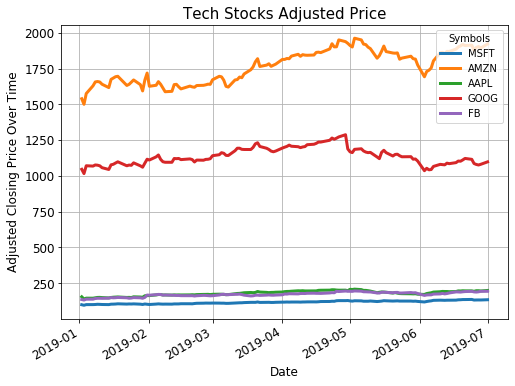

In [77]:
stock_adj_price = stock_data['Adj Close']
stock_adj_price.plot(figsize=(8,6),linewidth=3, grid=True, fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Adjusted Closing Price Over Time",fontsize=12)
plt.title("Tech Stocks Adjusted Price",fontsize=15)
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.

In [103]:
tech_daily_simply_return = stock_adj_price.pct_change()
tech_daily_simply_return.head()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036788,-0.025242,-0.099607,-0.028484,-0.029039
2019-01-04,0.046509,0.050064,0.042689,0.053786,0.047138
2019-01-07,0.001275,0.034353,-0.002226,-0.002167,0.000725
2019-01-08,0.007251,0.016612,0.019063,0.007385,0.032452


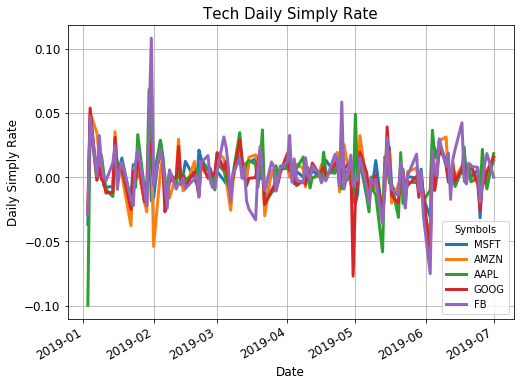

In [79]:
tech_daily_simply_return.plot(figsize=(8,6),linewidth=3, grid=True, fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Daily Simply Rate",fontsize=12)
plt.title("Tech Daily Simply Rate",fontsize=15)
plt.show()

### 5. Create subplots of daily simple rate of return.

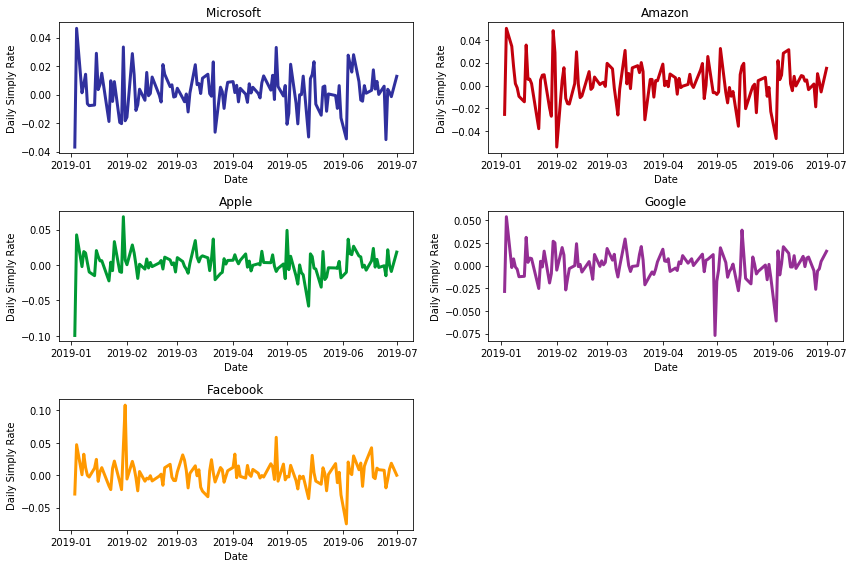

In [81]:
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)

ax1.plot(tech_daily_simply_return['MSFT'], linewidth=3, color = '#30309e')
ax1.set_title("Microsoft ")
ax1.set_ylabel("Daily Simply Rate")
ax1.set_xlabel("Date")

ax2.plot(tech_daily_simply_return['AMZN'], linewidth=3, color = '#c2000d')
ax2.set_title("Amazon")
ax2.set_ylabel("Daily Simply Rate")
ax2.set_xlabel("Date")

ax3.plot(tech_daily_simply_return['AAPL'], linewidth=3, color = '#009933')
ax3.set_title("Apple")
ax3.set_ylabel("Daily Simply Rate")
ax3.set_xlabel("Date")

ax4.plot(tech_daily_simply_return['GOOG'], linewidth=3, color = '#942e94')
ax4.set_title("Google")
ax4.set_ylabel("Daily Simply Rate")
ax4.set_xlabel("Date")

ax5.plot(tech_daily_simply_return['FB'], linewidth=3, color = '#ff9900')
ax5.set_title("Facebook")
ax5.set_ylabel("Daily Simply Rate")
ax5.set_xlabel("Date")

plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

In [82]:
mean_simple_return = tech_daily_simply_return.mean()
mean_simple_return

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
dtype: float64

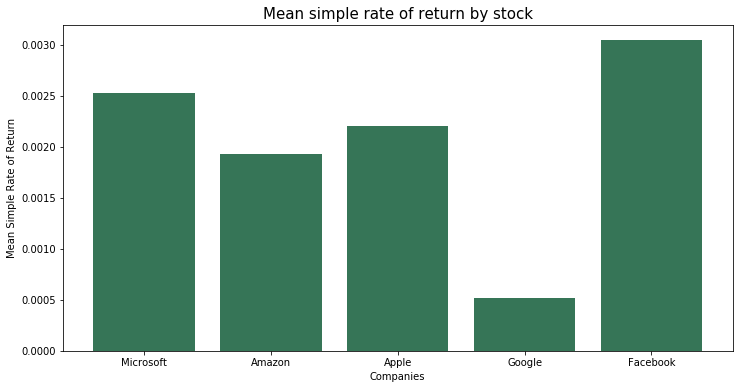

In [95]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot()
ax.bar(list(range(len(mean_simple_return))),mean_simple_return, color='#367557')
ax.set_xlabel('Companies')
ax.set_ylabel('Mean Simple Rate of Return')
ax.set_xticks(list(range(len(mean_simple_return))))
ax.set_xticklabels(['Microsoft','Amazon','Apple','Google','Facebook'])
plt.title('Mean simple rate of return by stock', fontsize=15)
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

In [91]:
var_simple_return = tech_daily_simply_return.var()
var_simple_return

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
dtype: float64

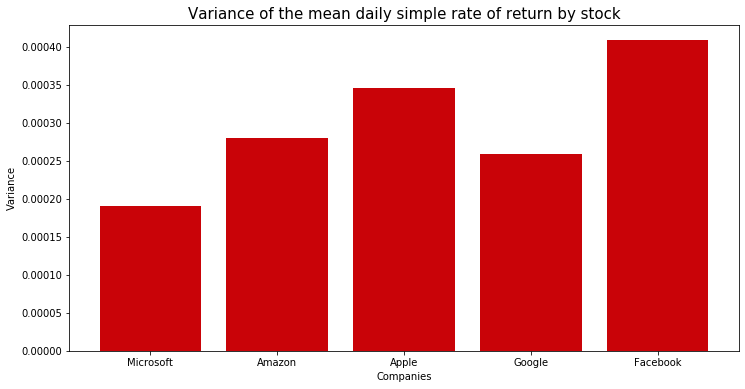

In [97]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot()
ax.bar(list(range(len(var_simple_return))),var_simple_return, color='#c90308')
ax.set_xlabel('Companies')
ax.set_ylabel('Variance')
ax.set_xticks(list(range(len(var_simple_return))))
ax.set_xticklabels(['Microsoft','Amazon','Apple','Google','Facebook'])
plt.title('Variance of the mean daily simple rate of return by stock', fontsize=15)
plt.show()

### 8. Calculate and plot the standard deviation

In [96]:
std_simple_return = tech_daily_simply_return.std()
std_simple_return

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
dtype: float64

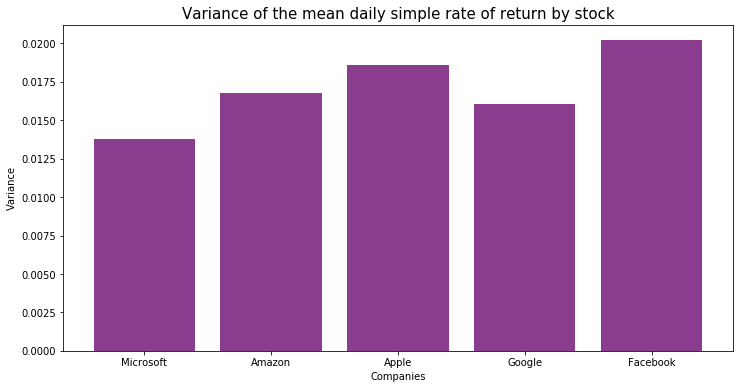

In [99]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot()
ax.bar(list(range(len(std_simple_return))),std_simple_return, color='#8a3d8f')
ax.set_xlabel('Companies')
ax.set_ylabel('Variance')
ax.set_xticks(list(range(len(std_simple_return))))
ax.set_xticklabels(['Microsoft','Amazon','Apple','Google','Facebook'])
plt.title('Variance of the mean daily simple rate of return by stock', fontsize=15)
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations

In [105]:
corr_matrix = tech_daily_simply_return.corr()
corr_matrix

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Symbols,,,,,
MSFT,1.000000,0.731492,0.652943,0.636987,0.454094
AMZN,0.731492,1.000000,0.610110,0.721504,0.572073
AAPL,0.652943,0.610110,1.000000,0.569773,0.438760
GOOG,0.636987,0.721504,0.569773,1.000000,0.633440
FB,0.454094,0.572073,0.438760,0.633440,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.